In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
train_df = pd.read_csv("../../../DATA/Kaggle/titanic/train.csv")
test_df =  pd.read_csv("../../../DATA/Kaggle/titanic/test.csv")
ss =  pd.read_csv("../../../DATA/Kaggle/titanic/gender_submission.csv")

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### Remove duplicates

In [22]:
print(f'\nbefore removing duplicates training data contains {train_df.shape[0]} records and {train_df.shape[1]} columns' )

train_df=train_df.drop_duplicates()
print(f'\nafter removing  duplicates training data contains {train_df.shape[0]} records and {train_df.shape[1]} columns' )



before removing duplicates training data contains 891 records and 12 columns

after removing  duplicates training data contains 891 records and 12 columns


In [23]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
ID_Col,Target_Col = 'PassengerId', 'Survived'

In [26]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Goodwin, Master. Sidney Leonard",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [65]:
train_df[Target_Col].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<AxesSubplot:>

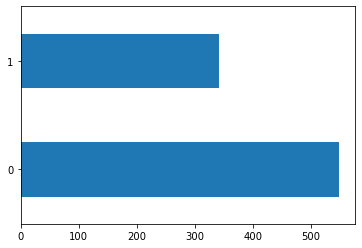

In [43]:
train_df[Target_Col].value_counts().plot(kind='barh')

In [44]:
train_df[Target_Col].isnull().sum()

0

In [51]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [52]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [59]:
Cat_Cols= ['Pclass', 'Sex','SibSp',
       'Parch','Embarked']

Num_Cols = ['Age','Fare']

Value_Cols = [c for c in train_df.columns if (c not in [Target_Col,ID_Col] and c not in Cat_Cols and c not in Num_Cols)]



In [62]:
print("ID:",ID_Col)
print("\nTarget:",Target_Col)
print("\nCategorical:",Cat_Cols)
print("\nNumerical:",Num_Cols)
print("\nValue:",Value_cols)

ID: PassengerId

Target: Survived

Categorical: ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

Numerical: ['Age', 'Fare']

Value: ['Name', 'Ticket', 'Cabin']


### Categorical Columns

In [84]:
train_df[Cat_Cols].isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [85]:
Embarked_mode=train_df['Embarked'].mode()

In [88]:
train_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [83]:
train_df['Embarked']= train_df['Embarked'].fillna(Embarked_mode[0])

In [91]:
train_df[Cat_Cols].isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

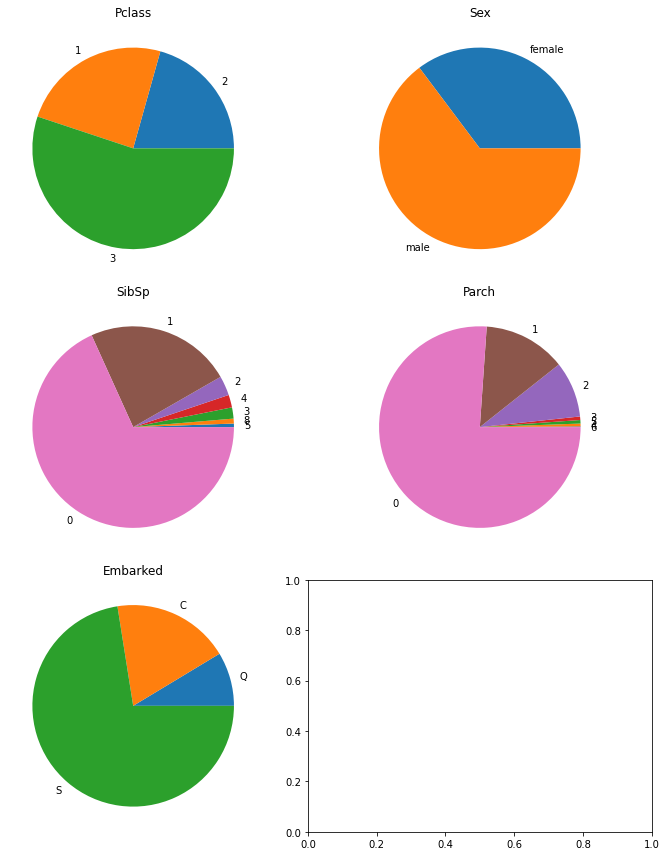

In [90]:
fig,axes = plt.subplots(3,2,figsize=(10,12))
axis = [ax for ax_row in axes for ax in ax_row]

for i,c in enumerate(train_df[Cat_Cols]):
    train_df[c].value_counts()[::-1].plot(kind='pie',ax = axis[i],title=c,fontsize=10)
    axis[i].set_ylabel('')
plt.tight_layout()

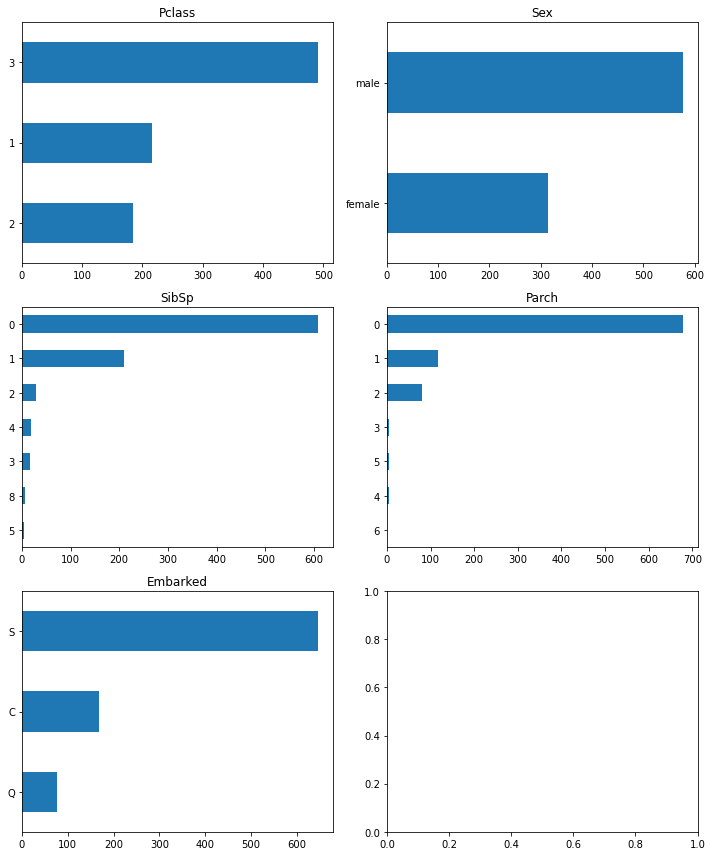

In [89]:
fig,axes = plt.subplots(3,2,figsize=(10,12))
axis = [ax for ax_row in axes for ax in ax_row]

for i,c in enumerate(train_df[Cat_Cols]):
    train_df[c].value_counts()[::-1].plot(kind='barh',ax = axis[i],title=c,fontsize=10)
    axis[i].set_ylabel('')
plt.tight_layout()

### Numerical Columns

In [93]:
Num_Cols

['Age', 'Fare']

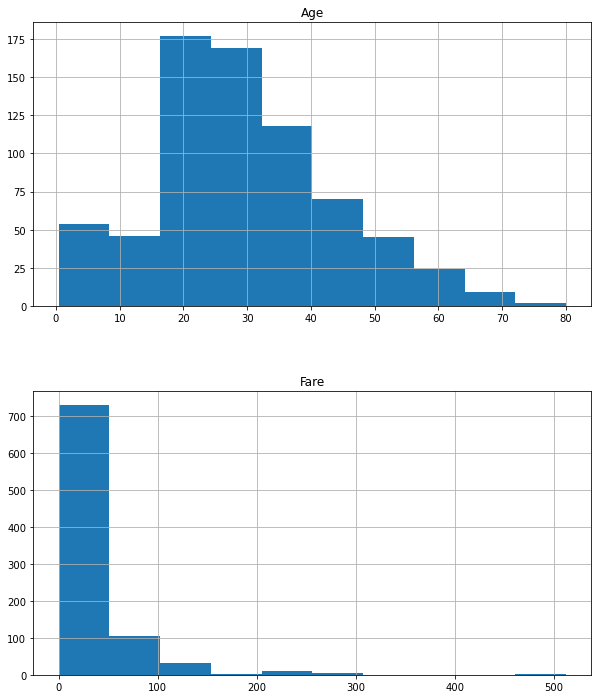

In [111]:
fig,axes = plt.subplots(2,1,figsize=(10,12))
for i,c in enumerate(Num_Cols):
    train_df[[c]].hist(ax=axes[i])

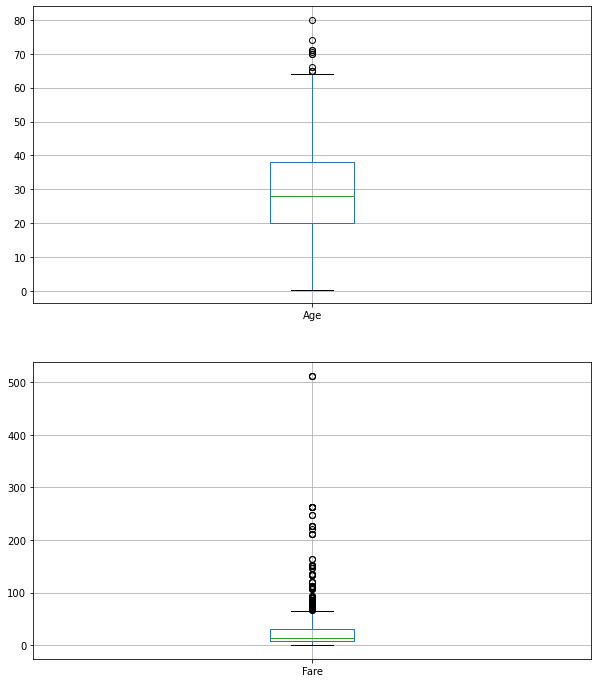

In [110]:
fig,axes = plt.subplots(2,1,figsize=(10,12))
for i,c in enumerate(Num_Cols):
    train_df[[c]].boxplot(ax=axes[i])

TypeError: 'AxesSubplot' object is not iterable

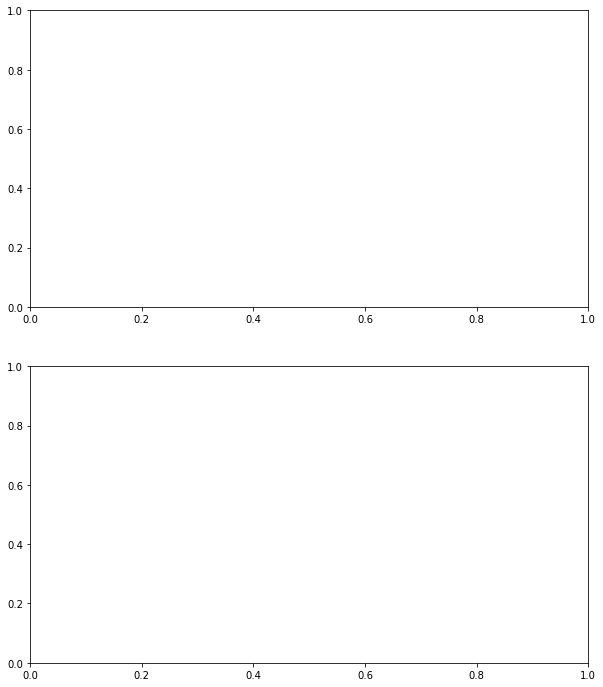

In [115]:
fig,axes = plt.subplots(2,1,figsize=(10,12))
for i,c in enumerate(Num_Cols):
    sns.kdeplot(data=train_df, x=c, ax=axes[i], fill=True)